In [1]:
import cv2
import re
import time
import numpy as np
import dask as d
import matplotlib.pyplot as plt

from glob import glob

In [2]:
from fl_tissue_model_tools import dev_config, defs
from fl_tissue_model_tools import preprocessing as prep
from fl_tissue_model_tools import zstacks as zs

In [3]:
dirs = dev_config.get_dev_directories("../dev_paths.txt")

In [4]:
# def proj_med(z_stack, axis):
#     return np.median(z_stack, axis=axis)

In [5]:
z_paths, z_stack = zs.z_stack_from_dir(f"{dirs.data_dir}/z_projection/A1", "tif", descending=True)
z_stack = prep.min_max_(z_stack, defs.GS_MIN, defs.GS_MAX, defs.TIF_MIN, defs.TIF_MAX)

In [6]:
# def blur_and_lap(image, kernel_size=5):
#     blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
#     return cv2.Laplacian(blurred, cv2.CV_64F, ksize=kernel_size)


# def focus_stack(stack, axis=0, kernel_size=5):
#     laps = np.array(
#         d.compute(
#             [d.delayed(blur_and_lap)(pos, kernel_size) for pos in stack]
#         )[0]
#     )
#     output = np.zeros_like(stack[0])
#     abs_laps = np.absolute(laps)
#     # maxima = abs_laps.max(axis=0)
#     maxima = np.max(abs_laps, axis=0)
#     mask = (abs_laps == maxima).astype(np.uint8)
#     for i in range(len(images)):
#         output = cv2.bitwise_not(stack[i], output, mask=mask[i])
#     return defs.GS_MAX - output

## Prototyping

In [7]:
images = z_stack.round().astype(np.uint8)

In [9]:
# start = time.time() * 1e3
# output_sm_blur = focus_stack(images, axis=0, kernel_size=3)
# output_lg_blur = focus_stack(images, axis=0, kernel_size=31)
# stop = time.time() * 1e3

In [10]:
start = time.time() * 1e3
output_sm_blur = zs.proj_focus_stack(images, axis=0, kernel_size=3)
output_lg_blur = zs.proj_focus_stack(images, axis=0, kernel_size=31)
stop = time.time() * 1e3

In [11]:
stop - start

1656.055908203125

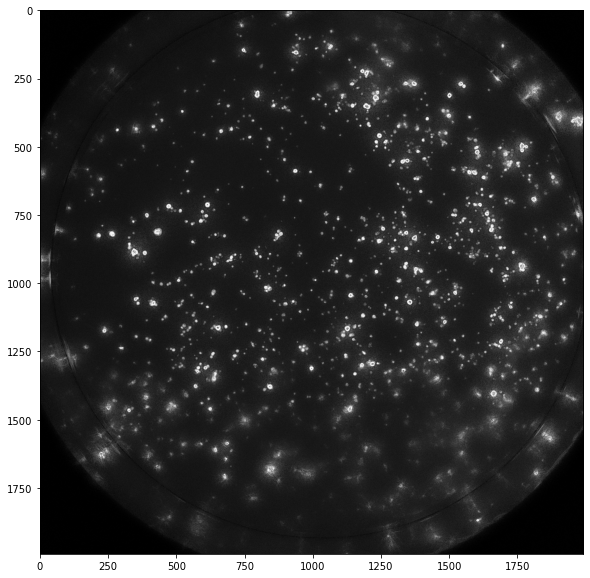

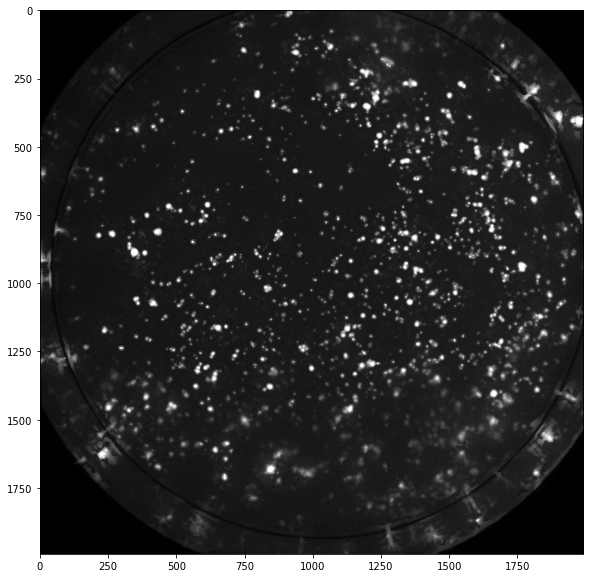

In [12]:
# plt.imshow(proj_fs, cmap="gray", vmin=defs.GS_MIN, vmax=defs.GS_MAX)
plt.figure(figsize=(10, 10))
plt.imshow(output_sm_blur, cmap="gray", vmin=defs.GS_MIN, vmax=defs.GS_MAX)
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(output_lg_blur, cmap="gray", vmin=defs.GS_MIN, vmax=defs.GS_MAX)
plt.show()

# Projections

## Average projection

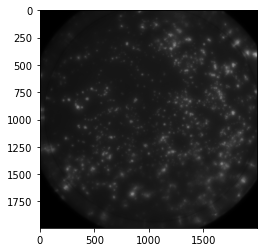

In [13]:
avg_proj = zs.proj_avg(z_stack, axis=0)
plt.imshow(avg_proj, cmap="gray", vmin=0, vmax=255)
plt.show()

## Median projection

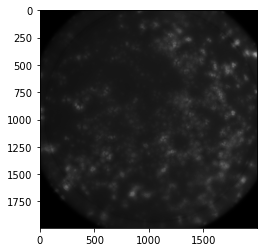

In [16]:
med_proj = zs.proj_med(z_stack, axis=0)
plt.imshow(med_proj, cmap="gray", vmin=0, vmax=255)
plt.show()

## Max projection

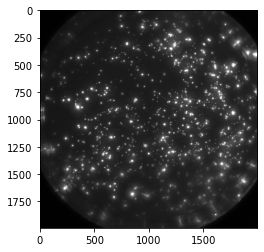

In [15]:
max_proj = zs.proj_max(z_stack, axis=0)
plt.imshow(max_proj, cmap="gray", vmin=0, vmax=255)
plt.show()

## Min projection

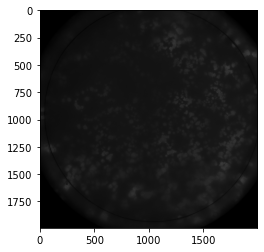

In [17]:
min_proj = zs.proj_min(z_stack, axis=0)
plt.imshow(min_proj, cmap="gray", vmin=0, vmax=255)
plt.show()